In [75]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.dummy import DummyClassifier
import seaborn as sn
import matplotlib.pyplot as plt
vect = CountVectorizer()

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.shape

(10000, 10)

In [5]:
yelp.stars.value_counts().sort_index()

1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

In [6]:
yelp_star = yelp[(yelp.stars == 1) | (yelp.stars == 5)]

In [7]:
yelp_star.tail(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9980,GHYOl_cnERMOhkCK_mGAlA,2011-07-03,Q-y3jSqccdytKxAyo1J0Xg,5,5 stars for the great $5 happy hour specials. ...,review,xZvRLPJ1ixhFVomkXSfXAw,6,6,4
9981,AX8lx9wHNYT45lyd7pxaYw,2008-11-27,IyunTh7jnG7v3EYwfF3hPw,5,We brought the entire family to Giuseppe's las...,review,fczQCSmaWF78toLEmb0Zsw,10,9,5
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2
9987,r-a-Cn9hxdEnYTtVTB5bMQ,2012-04-07,j9HwZZoBBmJgOlqDSuJcxg,1,The food is delicious. The service: discrimi...,review,toPtsUtYoRB-5-ThrOy2Fg,0,0,0
9989,mQUC-ATrFuMQSaDQb93Pug,2011-10-01,ta2P9joJqeFB8BzFp-AzjA,5,Great food and service! Country food at its best!,review,fKaO8fR1IAcfvZb6cBrs2w,0,1,0
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [8]:
X = yelp_star.text
y = yelp_star.stars
print(X.shape)
print(y.shape)

(4086,)
(4086,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3064,)
(1022,)
(3064,)
(1022,)


In [45]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 16825)

In [46]:
X_test_dtm = vect.transform(X_test)
X_test_dtm.shape

(1022, 16825)

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [13]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
y_pred_class = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)


0.9187866927592955

In [18]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[126,  58],
       [ 25, 813]], dtype=int64)

In [21]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit( X_train_dtm,y_train )
# or y_test.value_counts()
# y_test.value_counts().head(1) / y_test.shape
# 838 / float(838 + 184)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [22]:
y_pred_dummyclass = dummy_classifier.predict(X_test_dtm)

In [23]:
metrics.accuracy_score(y_test, y_pred_dummyclass)

0.8199608610567515

In [24]:
metrics.confusion_matrix(y_test, y_pred_dummyclass)

array([[  0, 184],
       [  0, 838]], dtype=int64)

In [25]:
X_test[y_pred_class < y_test]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
3149    I was told to see Greg after a local shop diag...
423     These guys helped me out with my rear windshie...
763     Here's the deal. I said I was done with OT, bu...
8956    I took my computer to RedSeven recently when m...
750     This store has the most pleasant employees of ...
9765    You can't give anything less than 5 stars to a...
6334    I came here today for a manicure and pedicure....
1282    Loved 

In [26]:
X_test[y_pred_class > y_test]

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\nI brought my Mountain Bike in (w...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
2490    Lazy Q CLOSED in 2010.  New Owners cleaned up ...
9125    La Grande Orange Grocery has a problem. It can...
9185    For frozen yogurt quality, I give this place a...
436     this another place that i would give no stars ...
2051    Sadly with new owners comes changes on menu.  ...
1721    This is the closest to a New York hipster styl...
3447    If you want a school that cares more about you...
842     Boy is

In [47]:

X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

16825

In [33]:
nb.feature_count_

array([[26.,  4.,  1., ...,  0.,  0.,  0.],
       [39.,  5.,  0., ...,  1.,  1.,  1.]])

In [30]:
nb.class_count_

array([ 565., 2499.])

In [35]:
one_star_token_count = nb.feature_count_[0, :]
five_star_token_count = nb.feature_count_[1, :]

In [50]:
tokens = pd.DataFrame({'token':X_train_tokens, 'one_star':one_star_token_count, 'five_star':five_star_token_count}).set_index('token')
tokens

,one_star,five_star
token,,
00,26.0,39.0
000,4.0,5.0
00a,1.0,0.0
00am,3.0,2.0
00pm,1.0,4.0
01,1.0,2.0
02,1.0,0.0
03,1.0,0.0
03342,1.0,0.0


In [51]:
tokens['one_star'] = tokens.one_star + 1
tokens['five_star'] = tokens.five_star + 1

In [54]:
tokens['one_star'] = tokens.one_star / nb.class_count_[0]
tokens['five_star'] = tokens.five_star / nb.class_count_[1]
tokens['five_star_ratio'] = tokens.five_star / tokens.one_star
tokens.sort_values('five_star_ratio', ascending=False).head(10)

,one_star,five_star,five_star_ratio
token,,,
fantastic,1.108880e-08,1.236683e-08,1.115254
perfect,1.663320e-08,1.569883e-08,0.943825
yum,5.544401e-09,3.972765e-09,0.716536
favorite,3.881081e-08,2.210652e-08,0.569597
outstanding,5.544401e-09,3.139766e-09,0.566295
brunch,5.544401e-09,2.691228e-09,0.485396
gem,5.544401e-09,2.563074e-09,0.462282
pasty,5.544401e-09,2.498998e-09,0.450725
mozzarella,5.544401e-09,2.498998e-09,0.450725


In [55]:
tokens.sort_values('five_star_ratio', ascending=True).head(10)

,one_star,five_star,five_star_ratio
token,,,
staffperson,9.425482e-08,6.407686e-11,0.000680
refused,7.762162e-08,6.407686e-11,0.000826
disgusting,1.330656e-07,1.281537e-10,0.000963
filthy,6.098841e-08,6.407686e-11,0.001051
unprofessional,4.989961e-08,6.407686e-11,0.001284
unacceptable,4.989961e-08,6.407686e-11,0.001284
acknowledge,4.989961e-08,6.407686e-11,0.001284
ugh,9.425482e-08,1.281537e-10,0.001360
fuse,4.435521e-08,6.407686e-11,0.001445


In [56]:
X = yelp.text
y = yelp.stars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [57]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)


0.4712

In [58]:
y_test.value_counts().head(1) / y_test.shape

4    0.3536
Name: stars, dtype: float64

In [84]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 55,  14,  24,  65,  27],
       [ 28,  16,  41, 122,  27],
       [  5,   7,  35, 281,  37],
       [  7,   0,  16, 629, 232],
       [  6,   4,   6, 373, 443]], dtype=int64)

In [60]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          1       0.54      0.30      0.38       185
          2       0.39      0.07      0.12       234
          3       0.29      0.10      0.14       365
          4       0.43      0.71      0.53       884
          5       0.58      0.53      0.55       832

avg / total       0.46      0.47      0.43      2500



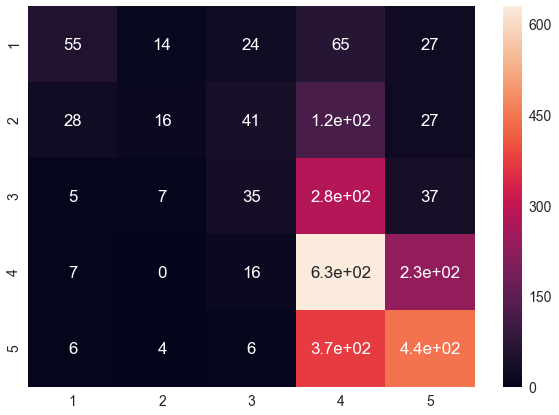

In [86]:
array = metrics.confusion_matrix(y_test, y_pred_class)

df_cm = pd.DataFrame(array, index = range(1,6),columns = range(1,6))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)